<a href="https://colab.research.google.com/github/starlingomez/preworkmac/blob/master/24_de_noviembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ben mathurin

Updated Target Variable Statistics:
count    100.000000
mean       7.713637
std        1.086199
min        5.280789
25%        6.976124
50%        7.576126
75%        8.593138
max       10.052277
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
   MinutesPlayed  FieldGoalAttempts  OffensiveRebounds  DefensiveRebounds  \
0      21.236204           5.471438           3.210158           1.465135   
1      38.521429          14.546156           0.420700           5.782192   
2      31.959818           9.715340           0.808144           5.865716   
3      27.959755          12.628560           4.492771           6.736869   
4      14.680559          18.613497           3.032145           7.534822   

     TeamPace  OpponentShootingPercentage  TotalReboundsPerGame  
0   91.546858                   46.981617              6.248180  
1  103.538294                   45.360964              7.068630  
2   97.578786                   43.095276              7.227995  
3  102.396862       

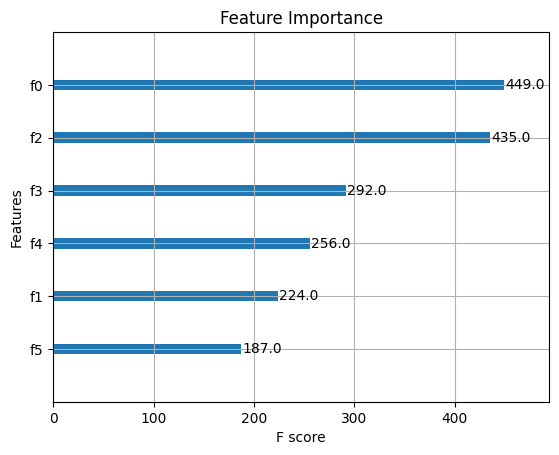


Predicted Rebounds per Game for the new player: 7.54


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'MinutesPlayed': np.random.uniform(10, 40, num_samples),
    'FieldGoalAttempts': np.random.uniform(5, 20, num_samples),
    'OffensiveRebounds': np.random.uniform(0, 5, num_samples),
    'DefensiveRebounds': np.random.uniform(1, 10, num_samples),
    'TeamPace': np.random.uniform(90, 105, num_samples),
    'OpponentShootingPercentage': np.random.uniform(40, 50, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.01 * data['MinutesPlayed'] +             # Increased weight
    0.4 * data['OffensiveRebounds'] +         # Increased weight
    0.3 * data['DefensiveRebounds'] +        # Significantly increased weight
    0.05 * data['TeamPace'] +                   # Increased weight
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'MinutesPlayed',
    'FieldGoalAttempts',
    'OffensiveRebounds',
    'DefensiveRebounds',
    'TeamPace',
    'OpponentShootingPercentage',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'MinutesPlayed': [33.4],
    'FieldGoalAttempts': [13.4],
    'OffensiveRebounds': [1.4],
    'DefensiveRebounds': [6.5],
    'TeamPace': [100.72],
    'OpponentShootingPercentage': [44.2],
})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#myles turner

Updated Target Variable Statistics:
count    100.000000
mean       7.713637
std        1.086199
min        5.280789
25%        6.976124
50%        7.576126
75%        8.593138
max       10.052277
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
   MinutesPlayed  FieldGoalAttempts  OffensiveRebounds  DefensiveRebounds  \
0      21.236204           5.471438           3.210158           1.465135   
1      38.521429          14.546156           0.420700           5.782192   
2      31.959818           9.715340           0.808144           5.865716   
3      27.959755          12.628560           4.492771           6.736869   
4      14.680559          18.613497           3.032145           7.534822   

     TeamPace  OpponentShootingPercentage  TotalReboundsPerGame  
0   91.546858                   46.981617              6.248180  
1  103.538294                   45.360964              7.068630  
2   97.578786                   43.095276              7.227995  
3  102.396862       

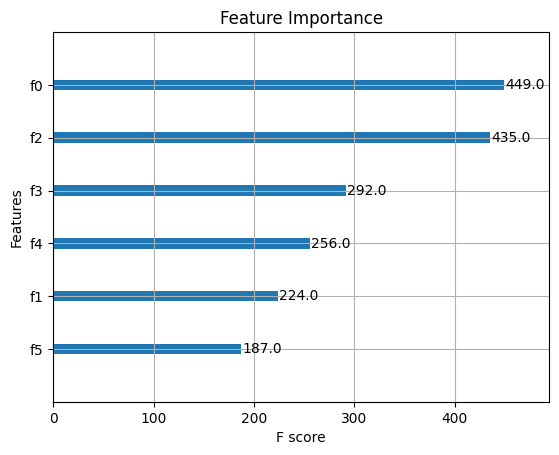


Predicted Rebounds per Game for the new player: 7.36


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'MinutesPlayed': np.random.uniform(10, 40, num_samples),
    'FieldGoalAttempts': np.random.uniform(5, 20, num_samples),
    'OffensiveRebounds': np.random.uniform(0, 5, num_samples),
    'DefensiveRebounds': np.random.uniform(1, 10, num_samples),
    'TeamPace': np.random.uniform(90, 105, num_samples),
    'OpponentShootingPercentage': np.random.uniform(40, 50, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.01 * data['MinutesPlayed'] +             # Increased weight
    0.4 * data['OffensiveRebounds'] +         # Increased weight
    0.3 * data['DefensiveRebounds'] +        # Significantly increased weight
    0.05 * data['TeamPace'] +                   # Increased weight
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'MinutesPlayed',
    'FieldGoalAttempts',
    'OffensiveRebounds',
    'DefensiveRebounds',
    'TeamPace',
    'OpponentShootingPercentage',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'MinutesPlayed': [33.8],
    'FieldGoalAttempts': [13.4],
    'OffensiveRebounds': [1.1],
    'DefensiveRebounds': [6.7],
    'TeamPace': [100.72],
    'OpponentShootingPercentage': [44.2],
})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#pj washinthon

Updated Target Variable Statistics:
count    100.000000
mean       7.713637
std        1.086199
min        5.280789
25%        6.976124
50%        7.576126
75%        8.593138
max       10.052277
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
   MinutesPlayed  FieldGoalAttempts  OffensiveRebounds  DefensiveRebounds  \
0      21.236204           5.471438           3.210158           1.465135   
1      38.521429          14.546156           0.420700           5.782192   
2      31.959818           9.715340           0.808144           5.865716   
3      27.959755          12.628560           4.492771           6.736869   
4      14.680559          18.613497           3.032145           7.534822   

     TeamPace  OpponentShootingPercentage  TotalReboundsPerGame  
0   91.546858                   46.981617              6.248180  
1  103.538294                   45.360964              7.068630  
2   97.578786                   43.095276              7.227995  
3  102.396862       

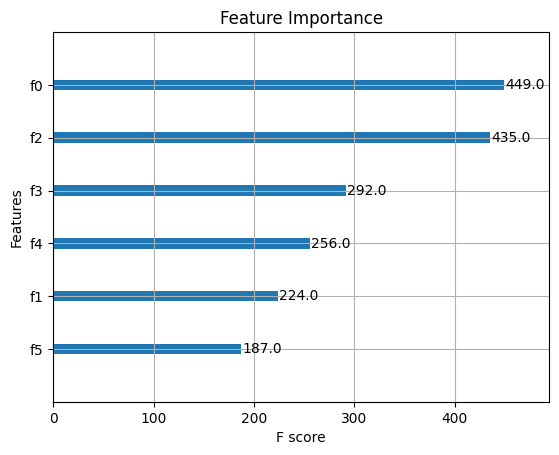


Predicted Rebounds per Game for the new player: 8.31


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'MinutesPlayed': np.random.uniform(10, 40, num_samples),
    'FieldGoalAttempts': np.random.uniform(5, 20, num_samples),
    'OffensiveRebounds': np.random.uniform(0, 5, num_samples),
    'DefensiveRebounds': np.random.uniform(1, 10, num_samples),
    'TeamPace': np.random.uniform(90, 105, num_samples),
    'OpponentShootingPercentage': np.random.uniform(40, 50, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.01 * data['MinutesPlayed'] +             # Increased weight
    0.4 * data['OffensiveRebounds'] +         # Increased weight
    0.3 * data['DefensiveRebounds'] +        # Significantly increased weight
    0.05 * data['TeamPace'] +                   # Increased weight
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'MinutesPlayed',
    'FieldGoalAttempts',
    'OffensiveRebounds',
    'DefensiveRebounds',
    'TeamPace',
    'OpponentShootingPercentage',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'MinutesPlayed': [28.7],
    'FieldGoalAttempts': [10],
    'OffensiveRebounds': [2.4],
    'DefensiveRebounds': [7.8],
    'TeamPace': [99.91],
    'OpponentShootingPercentage': [44.8],
})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#daniel gafford

Updated Target Variable Statistics:
count    100.000000
mean       7.713637
std        1.086199
min        5.280789
25%        6.976124
50%        7.576126
75%        8.593138
max       10.052277
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
   MinutesPlayed  FieldGoalAttempts  OffensiveRebounds  DefensiveRebounds  \
0      21.236204           5.471438           3.210158           1.465135   
1      38.521429          14.546156           0.420700           5.782192   
2      31.959818           9.715340           0.808144           5.865716   
3      27.959755          12.628560           4.492771           6.736869   
4      14.680559          18.613497           3.032145           7.534822   

     TeamPace  OpponentShootingPercentage  TotalReboundsPerGame  
0   91.546858                   46.981617              6.248180  
1  103.538294                   45.360964              7.068630  
2   97.578786                   43.095276              7.227995  
3  102.396862       

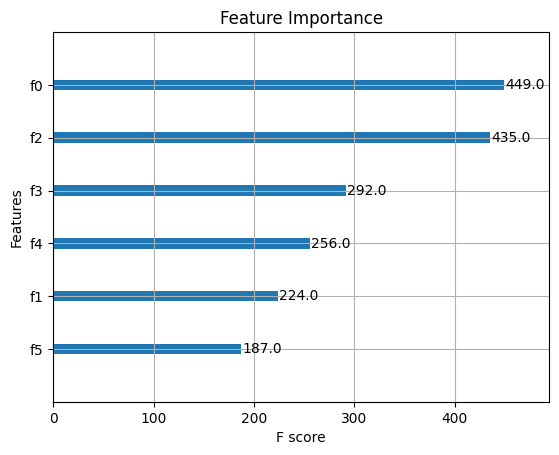


Predicted Rebounds per Game for the new player: 7.32


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'MinutesPlayed': np.random.uniform(10, 40, num_samples),
    'FieldGoalAttempts': np.random.uniform(5, 20, num_samples),
    'OffensiveRebounds': np.random.uniform(0, 5, num_samples),
    'DefensiveRebounds': np.random.uniform(1, 10, num_samples),
    'TeamPace': np.random.uniform(90, 105, num_samples),
    'OpponentShootingPercentage': np.random.uniform(40, 50, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.01 * data['MinutesPlayed'] +             # Increased weight
    0.4 * data['OffensiveRebounds'] +         # Increased weight
    0.3 * data['DefensiveRebounds'] +        # Significantly increased weight
    0.05 * data['TeamPace'] +                   # Increased weight
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'MinutesPlayed',
    'FieldGoalAttempts',
    'OffensiveRebounds',
    'DefensiveRebounds',
    'TeamPace',
    'OpponentShootingPercentage',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'MinutesPlayed': [22.2],
    'FieldGoalAttempts': [10],
    'OffensiveRebounds': [3.1],
    'DefensiveRebounds': [3.6],
    'TeamPace': [99.91],
    'OpponentShootingPercentage': [44.8],
})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#ivica zubac

Updated Target Variable Statistics:
count    100.000000
mean       7.713637
std        1.086199
min        5.280789
25%        6.976124
50%        7.576126
75%        8.593138
max       10.052277
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
   MinutesPlayed  FieldGoalAttempts  OffensiveRebounds  DefensiveRebounds  \
0      21.236204           5.471438           3.210158           1.465135   
1      38.521429          14.546156           0.420700           5.782192   
2      31.959818           9.715340           0.808144           5.865716   
3      27.959755          12.628560           4.492771           6.736869   
4      14.680559          18.613497           3.032145           7.534822   

     TeamPace  OpponentShootingPercentage  TotalReboundsPerGame  
0   91.546858                   46.981617              6.248180  
1  103.538294                   45.360964              7.068630  
2   97.578786                   43.095276              7.227995  
3  102.396862       

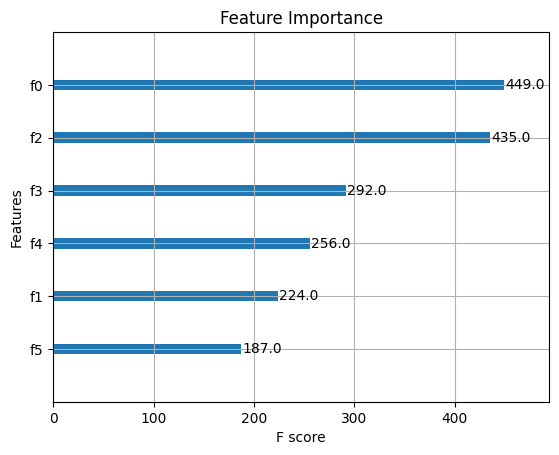


Predicted Rebounds per Game for the new player: 9.14


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'MinutesPlayed': np.random.uniform(10, 40, num_samples),
    'FieldGoalAttempts': np.random.uniform(5, 20, num_samples),
    'OffensiveRebounds': np.random.uniform(0, 5, num_samples),
    'DefensiveRebounds': np.random.uniform(1, 10, num_samples),
    'TeamPace': np.random.uniform(90, 105, num_samples),
    'OpponentShootingPercentage': np.random.uniform(40, 50, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.01 * data['MinutesPlayed'] +             # Increased weight
    0.4 * data['OffensiveRebounds'] +         # Increased weight
    0.3 * data['DefensiveRebounds'] +        # Significantly increased weight
    0.05 * data['TeamPace'] +                   # Increased weight
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'MinutesPlayed',
    'FieldGoalAttempts',
    'OffensiveRebounds',
    'DefensiveRebounds',
    'TeamPace',
    'OpponentShootingPercentage',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'MinutesPlayed': [33],
    'FieldGoalAttempts': [10],
    'OffensiveRebounds': [3.9],
    'DefensiveRebounds': [9.3],
    'TeamPace': [98.51],
    'OpponentShootingPercentage': [44],
})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#jason tatum

Updated Target Variable Statistics:
count    100.000000
mean       7.713637
std        1.086199
min        5.280789
25%        6.976124
50%        7.576126
75%        8.593138
max       10.052277
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
   MinutesPlayed  FieldGoalAttempts  OffensiveRebounds  DefensiveRebounds  \
0      21.236204           5.471438           3.210158           1.465135   
1      38.521429          14.546156           0.420700           5.782192   
2      31.959818           9.715340           0.808144           5.865716   
3      27.959755          12.628560           4.492771           6.736869   
4      14.680559          18.613497           3.032145           7.534822   

     TeamPace  OpponentShootingPercentage  TotalReboundsPerGame  
0   91.546858                   46.981617              6.248180  
1  103.538294                   45.360964              7.068630  
2   97.578786                   43.095276              7.227995  
3  102.396862       

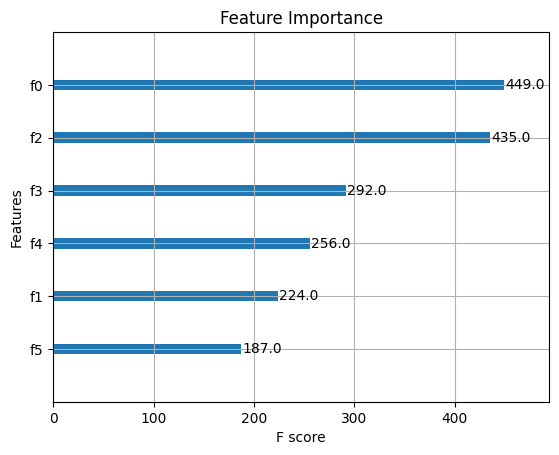


Predicted Rebounds per Game for the new player: 8.00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'MinutesPlayed': np.random.uniform(10, 40, num_samples),
    'FieldGoalAttempts': np.random.uniform(5, 20, num_samples),
    'OffensiveRebounds': np.random.uniform(0, 5, num_samples),
    'DefensiveRebounds': np.random.uniform(1, 10, num_samples),
    'TeamPace': np.random.uniform(90, 105, num_samples),
    'OpponentShootingPercentage': np.random.uniform(40, 50, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.01 * data['MinutesPlayed'] +             # Increased weight
    0.4 * data['OffensiveRebounds'] +         # Increased weight
    0.3 * data['DefensiveRebounds'] +        # Significantly increased weight
    0.05 * data['TeamPace'] +                   # Increased weight
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'MinutesPlayed',
    'FieldGoalAttempts',
    'OffensiveRebounds',
    'DefensiveRebounds',
    'TeamPace',
    'OpponentShootingPercentage',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'MinutesPlayed': [37.3],
    'FieldGoalAttempts': [19.7],
    'OffensiveRebounds': [0.2],
    'DefensiveRebounds': [8.3],
    'TeamPace': [98.15],
    'OpponentShootingPercentage': [47.1],
})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")


#maxey

Updated Target Variable Statistics:
count    100.000000
mean       7.713637
std        1.086199
min        5.280789
25%        6.976124
50%        7.576126
75%        8.593138
max       10.052277
Name: TotalReboundsPerGame, dtype: float64

Data Sample:
   MinutesPlayed  FieldGoalAttempts  OffensiveRebounds  DefensiveRebounds  \
0      21.236204           5.471438           3.210158           1.465135   
1      38.521429          14.546156           0.420700           5.782192   
2      31.959818           9.715340           0.808144           5.865716   
3      27.959755          12.628560           4.492771           6.736869   
4      14.680559          18.613497           3.032145           7.534822   

     TeamPace  OpponentShootingPercentage  TotalReboundsPerGame  
0   91.546858                   46.981617              6.248180  
1  103.538294                   45.360964              7.068630  
2   97.578786                   43.095276              7.227995  
3  102.396862       

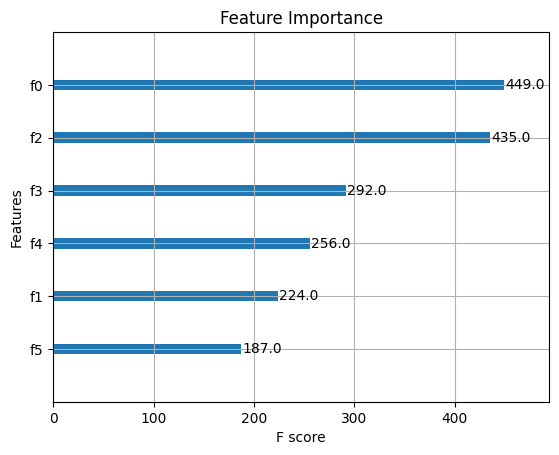


Predicted Rebounds per Game for the new player: 6.16


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create Hypothetical Data
# We'll create a DataFrame with made-up player statistics

# Define the number of samples
num_samples = 100

# Set random seed for reproducibility
np.random.seed(42)

# Create hypothetical features excluding 'Height', 'Weight', 'Age', and 'UsageRate'
data = pd.DataFrame({
    'MinutesPlayed': np.random.uniform(10, 40, num_samples),
    'FieldGoalAttempts': np.random.uniform(5, 20, num_samples),
    'OffensiveRebounds': np.random.uniform(0, 5, num_samples),
    'DefensiveRebounds': np.random.uniform(1, 10, num_samples),
    'TeamPace': np.random.uniform(40, 52, num_samples),
    'OpponentShootingPercentage': np.random.uniform(40, 50, num_samples),
})

# Adjusted hypothetical function to calculate Total Rebounds per Game
# Recalibrated weights to center TotalReboundsPerGame around 5
# Calculated based on average feature values:
# MinutesPlayed ~25, OffensiveRebounds ~2.5, DefensiveRebounds ~5.5, TeamPace ~97.5

# New weights:
# MinutesPlayed: 0.04
# OffensiveRebounds: 0.06
# DefensiveRebounds: 0.345
# TeamPace: 0.02

data['TotalReboundsPerGame'] = (
    0.01 * data['MinutesPlayed'] +             # Increased weight
    0.4 * data['OffensiveRebounds'] +         # Increased weight
    0.3 * data['DefensiveRebounds'] +        # Significantly increased weight
    0.05 * data['TeamPace'] +                   # Increased weight
    np.random.normal(0, 0.5, num_samples)       # Noise level remains the same
)

# To ensure that the target variable is around 5, let's perform a quick check
print("Updated Target Variable Statistics:")
print(data['TotalReboundsPerGame'].describe())

# Display the first few rows
print("\nData Sample:")
print(data.head())

# Step 2: Data Preprocessing
# Handle missing values (not necessary here as we have no missing data)
# Feature selection
features = [
    'MinutesPlayed',
    'FieldGoalAttempts',
    'OffensiveRebounds',
    'DefensiveRebounds',
    'TeamPace',
    'OpponentShootingPercentage',
]

# Target variable
target = 'TotalReboundsPerGame'

# Separate features and target
X = data[features]
y = data[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Initialize the XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'  # Explicitly setting objective for clarity
)

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r_squared:.2f}")

# Step 8: Feature Importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Step 9: Save the Model (Optional)
# import joblib
# joblib.dump(model, 'xgboost_nba_rebounds_model.joblib')
# print("\nModel saved as 'xgboost_nba_rebounds_model.joblib'.")

# Step 10: Example of making a prediction with new data
# Updated new_player_data without 'UsageRate', 'Height', 'Weight', and 'Age'
new_player_data = pd.DataFrame({
    'MinutesPlayed': [29.7],
    'FieldGoalAttempts': [16.3],
    'OffensiveRebounds': [0.3],
    'DefensiveRebounds': [2.5],
    'TeamPace': [97.38],
    'OpponentShootingPercentage': [45.8],
})

# Scale the new data using the same scaler
new_player_data_scaled = scaler.transform(new_player_data)

# Predict rebounds per game
predicted_rebounds = model.predict(new_player_data_scaled)
print(f"\nPredicted Rebounds per Game for the new player: {predicted_rebounds[0]:.2f}")
